In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner

In [13]:
filename = 'chains/test.chains'
name = '000'

burnin = 500
thin = 1

pname = ['A_s', 'n_s', 'r']

In [14]:
reader = emcee.backends.HDFBackend(filename, name=name, read_only=True)
samples = reader.get_chain(discard=burnin, thin=thin, flat=True)

ndim = samples.shape[1]
print 'number of samples =', samples.shape[0]

number of samples = 52000


In [15]:
lnpos = reader.get_log_prob(discard=burnin, flat=True)
bf = samples[np.argmax(lnpos),:]

print 'best fit = ', bf

best fit =  [  9.99936978e-01   9.57827218e-01   8.29767814e-04]


In [25]:
means = []
stds = []
for i in range(ndim):
    means.append(np.mean(samples[:,i]))
    stds.append(np.std(samples[:,i]))

for i in range(ndim):
    print '%s = %f +- %f' % (pname[i], means[i], stds[i])

A_s = 1.000460 +- 0.004093
n_s = 0.960020 +- 0.006159
r = 0.040602 +- 0.033218


In [28]:
per = [2.5, 16., 50., 84., 97.5]
for i in range(ndim):
    print pname[i]+': ', np.percentile(samples[:,i], per, axis=0)

A_s:  [ 0.99236536  0.99645716  1.00043206  1.00447358  1.00846263]
n_s:  [ 0.94802551  0.95389401  0.95998612  0.96611727  0.97216074]
r:  [ 0.0014145   0.00903483  0.03267204  0.07285941  0.12287537]


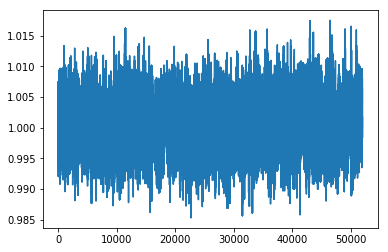

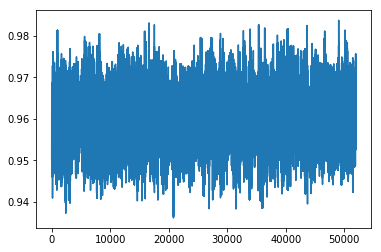

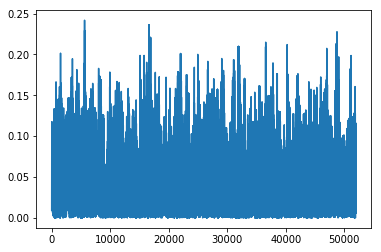

In [27]:
for i in range(samples.shape[1]):
    plt.plot(samples[:,i])
    plt.show()

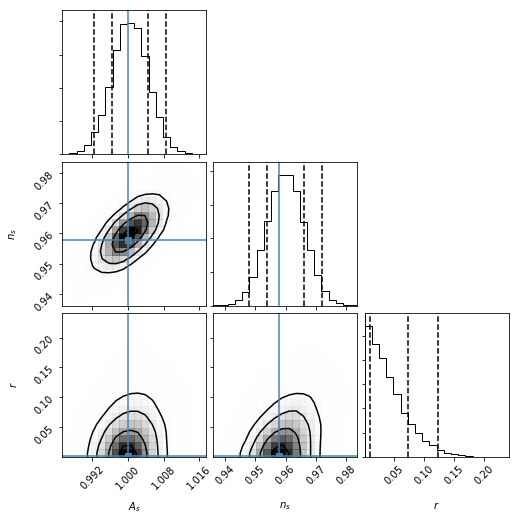

In [6]:
corner.corner(samples, labels=('$A_s$', '$n_s$', '$r$'), quantiles=(0.025, 0.16, 0.84, 0.975), 
              truths=bf, plot_datapoints=False, smooth=1.)
plt.show()